<a href="https://colab.research.google.com/github/sun-fox/GluonCV-Mxnet/blob/master/GluonCV_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Check cuda version
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [4]:
!pip install mxnet-cu101mkl
!pip install gluoncv

     |████████████████████████████████| 711.0MB 26kB/s 


In [0]:
import mxnet as mx

In [0]:
import gluoncv as gcv
import matplotlib.pyplot as plt

In [7]:
image_url = "https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/mt_baker.jpg"
image_filepath = 'mt_baker.jpg'
gcv.utils.download(url=image_url, path=image_filepath)

305KB [00:00, 20054.91KB/s]            


'mt_baker.jpg'

In [10]:
script_url = "https://gluon-cv.mxnet.io/_downloads/5966af3c5a6133b4f80f4892e25fb82e/demo_imagenet.py"
script_filepath = "demo_imagenet.py"
gcv.utils.download(url=script_url,path=script_filepath)

2KB [00:00, 715.63KB/s]              


'demo_imagenet.py'

In [12]:
!python demo_imagenet.py --model ResNet50_v1d --input-pic mt_baker.jpg

55464KB [00:03, 18309.11KB/s]               
The input picture is classified to be
	[volcano], with probability 0.832.
	[alp], with probability 0.051.
	[valley], with probability 0.006.
	[mountain tent], with probability 0.005.
	[lakeside], with probability 0.005.


In [0]:
image = mx.image.imread('mt_baker.jpg')

In [16]:
print('type',type(image))
print('type',image.shape)

type <class 'mxnet.ndarray.ndarray.NDArray'>
type (1458, 3000, 3)


In [17]:
print('data type',image.dtype)

data type <class 'numpy.uint8'>


In [18]:
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

minimum value: 0
maximum value: 255


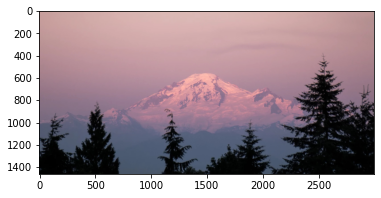

In [20]:
plt.imshow(image.asnumpy())

In [0]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [22]:
print('type',type(image))
print('type',image.shape)
print('minimum value:', image.min().asscalar())
print('maximum value:', image.max().asscalar())

type <class 'mxnet.ndarray.ndarray.NDArray'>
type (1, 3, 224, 224)
minimum value: -2.117904
maximum value: 2.2489083


In [0]:
network = gcv.model_zoo.get_model('ResNet50_v1d',pretrained=True)

In [26]:
prediction = network(image)
print(prediction.shape)

(1, 1000)


In [27]:
prediction = prediction[0]
print(prediction.shape)

(1000,)


In [28]:
print('Skipping 950 values...')
print(prediction[950:])

Skipping 950 values...

[ 1.6271267   0.36589456  0.85588187  0.33442783  0.5412198  -0.3009278
  0.3592903   0.6543574   1.4262843   0.25889024  0.9882151   0.8814945
  0.16783854  0.08977987  0.2744235   0.24109213  0.56991094  0.2599588
  0.68577445  0.31329736  6.6668687   1.3856452   1.9567913  -0.12317836
  1.7558143   4.34455     2.188921    1.2312093   2.3473246   4.5749245
  9.468041   -0.30541041 -0.6476071  -0.52499914  0.9335223   0.7344688
  0.6339683   0.08523059  0.49712777  0.47199667  0.68814534  0.5201406
  0.48171836  1.0798149   1.253247    0.8967042  -0.43378907  0.68775344
  0.70875716  0.7740849 ]
<NDArray 50 @cpu(0)>


In [0]:
probability = mx.nd.softmax(prediction)

In [31]:
rounded_probability = mx.nd.round(probability*100)/100
print('Skipping 950 values...')
print(rounded_probability[950:])

Skipping 950 values...

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.05 0.   0.   0.   0.   0.   0.   0.
 0.   0.01 0.83 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 50 @cpu(0)>


In [32]:
mx.nd.softmax(mx.nd.array((-0.5,0.5)))


[0.26894143 0.73105854]
<NDArray 2 @cpu(0)>

In [34]:
mx.nd.softmax(mx.nd.array((-0.5,1.0)))


[0.18242551 0.81757456]
<NDArray 2 @cpu(0)>

In [35]:
mx.nd.softmax(mx.nd.array((-1.0,1.0)))


[0.11920292 0.8807971 ]
<NDArray 2 @cpu(0)>

In [37]:
k=5 
topk_indices = mx.nd.topk(probability, k=k)
topk_indices


[980. 970. 979. 672. 975.]
<NDArray 5 @cpu(0)>

In [38]:
network.classes[980]

'volcano'

In [42]:
for i in range(k):
  class_index = topk_indices[i].astype('int').asscalar()
  class_label = network.classes[class_index]
  class_probability = probability[class_index]
  print('#{} {} ({:0.3}%)'.format(i+1, class_label, class_probability.asscalar()*100))

#1 volcano (83.2%)
#2 alp (5.06%)
#3 valley (0.624%)
#4 mountain tent (0.537%)
#5 lakeside (0.496%)
